# Курсовая работа по курсу "Технологии машинного обучения"

Выполнила: Беспалова У.А.  
Группа: ИУ5-63  
Руководитель: Гапанюк Ю.Е.

### 1. Поиск и выбор набора данных для построения моделей машинного обучения. 

В качестве набора данных для курсовой работы был выбран датасет, содержащий информацию о покемонах (https://www.kaggle.com/abcsds/pokemon).

В датасете представлены подробные характеристики покемонов, описанные в следующих колонках:
- '#' - ID покемона
- Name - имя покемона
- Type 1 - каждый покемон имеет тип, определяющий его слабые и сильные стороны
- Type 2 - некоторые покемоны могут иметь второй тип
- HP - стойкость. Данная характеристика показывает, какой урон может вынести покемон
- Attack - базовый показатель для обычных атак
- Defense - способность покемона противостоять обычным атакам
- SP Atk - показатель для специальных атак
- SP Def - показатель, определяющий способность выдерживать специальные атаки 
- Speed - скорость покемона
- Generation - поколение, к которому относится покемон
- **Legendary** - значение, определяющее, является ли покемон легендарным. Целевой признак датасета

Атрибуты, описывающие физические показатели покемонов, представлены числовыми значениями, что делает их сравнимыми друг с другом и даёт возможность легко использовать в анализе данных. На основе представленных характеристик мы будем решать задачу **классификации** - оценивать, относится покемон к категории легендарных или нет. 



------------------------------------------------

### 2. Загрузка и разведочный анализ данных. Кодирование категориальных признаков

In [276]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [295]:
data = pd.read_csv('Pokemon.csv')

In [296]:
#Первые 5 записей
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,True
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,True
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [297]:
print('Количество строк = ', data.shape[0])
print('Количество колонок = ', data.shape[1])

Количество строк =  800
Количество колонок =  12


In [298]:
# Список признаков
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [299]:
# Типы признаков
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

Целевой признак датасета - Legendary - является булевым, что осложняет задачу анализа и классификации. В дальнейшем он будет преобразован в int64. (значение 1 если покемон легендарный, и 0, если нет)
  
Признаки '#' и 'Name' не содержат полезной информации, и потому можут быть удалены.  
  
Помимо этого, в датасете содержится два категориальных признака - 'Type 1' и 'Type 2', которые необходимо будет преобразовать в численные. 
Поскольку не все покемоны имеют второй тип, для некоторых строк значение 'Type 2' будет пустым:

In [300]:
# Количество порпусков для каждого признака
data.isnull().sum() 

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [301]:
data['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

Поскольку сам факт наличия второго типа у покемона является характеристикой его способностей, сделаем данный признак бинарным, осуществив кодирование следующим образом: 1 - если у покемона имеется второй тип, независимо от того, какой именно, и 0 - если он отсуствует.    

In [302]:
data['Type 2']=data['Type 2'].replace(np.nan, 0)

data['Type 2']=data['Type 2'].replace('Poison', 1)
data['Type 2']=data['Type 2'].replace('Flying', 1)
data['Type 2']=data['Type 2'].replace('Dragon', 1)
data['Type 2']=data['Type 2'].replace('Ground', 1)
data['Type 2']=data['Type 2'].replace('Fairy', 1)
data['Type 2']=data['Type 2'].replace('Grass', 1)

data['Type 2']=data['Type 2'].replace('Fighting', 1)
data['Type 2']=data['Type 2'].replace('Psychic', 1)
data['Type 2']=data['Type 2'].replace('Steel', 1)
data['Type 2']=data['Type 2'].replace('Ice', 1)
data['Type 2']=data['Type 2'].replace('Rock', 1)
data['Type 2']=data['Type 2'].replace('Dark', 1)

data['Type 2']=data['Type 2'].replace('Water', 1)
data['Type 2']=data['Type 2'].replace('Electric', 1)
data['Type 2']=data['Type 2'].replace('Fire', 1)
data['Type 2']=data['Type 2'].replace('Ghost', 1)
data['Type 2']=data['Type 2'].replace('Bug', 1)
data['Type 2']=data['Type 2'].replace('Normal', 1)

In [303]:
#После преобразования признак Type 2 имеет всего два значения:
data['Type 2'].unique()

array([1, 0])

In [304]:
#Удаляем лишние колонки:
data.drop(['#'], axis=1, inplace=True)
data.drop(['Name'], axis=1, inplace=True)

In [305]:
#Преобразуем бинарный целевой признак к числовому типу:
data['Legendary']=data['Legendary'].replace({False:0,True:1})

In [306]:
#Выполняем кодирование категориального признака
lab_enc = LabelEncoder()
lab_enc.fit(data['Type 1'])
data['Type 1'] = lab_enc.transform(data['Type 1'])

data['Type 1'].unique()

array([ 9,  6, 17,  0, 12, 13,  3, 10,  4,  5, 14, 15,  8, 11,  2,  1, 16,
        7])

In [307]:
#Данные после всех преобразований:
data.dtypes

Type 1        int64
Type 2        int64
HP            int64
Attack        int64
Defense       int64
Sp. Atk       int64
Sp. Def       int64
Speed         int64
Generation    int64
Legendary     int64
dtype: object

In [293]:
data.describe()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000
mean,9.467500,0.517500,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.210000
std,5.580356,0.500006,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.407563
min,0.000000,0.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.000000
25%,5.000000,0.000000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.000000
50%,10.000000,1.000000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.000000
75%,14.000000,1.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.000000
max,17.000000,1.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.000000


-----------------------------------------

Для непрерывных признаков построим графики violinplot и диаграммы распределения:

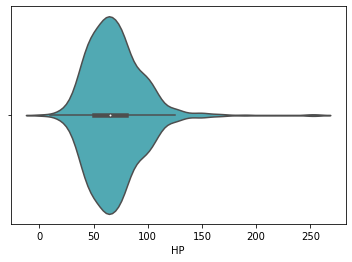

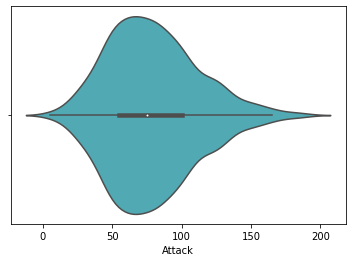

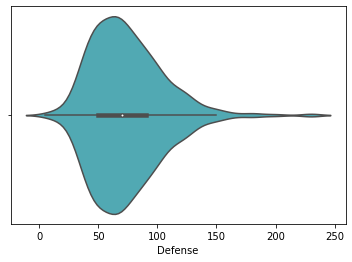

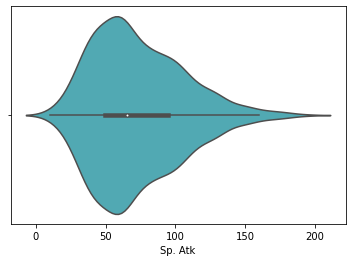

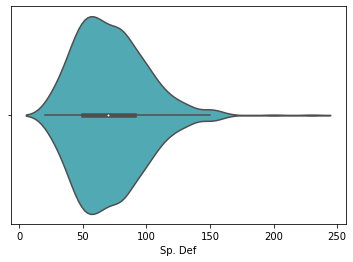

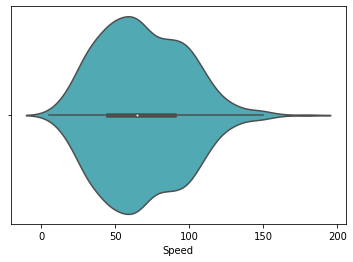

In [323]:
num_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

for col in num_cols:
    sns.violinplot(x=data[col], palette='YlGnBu')
    plt.show()

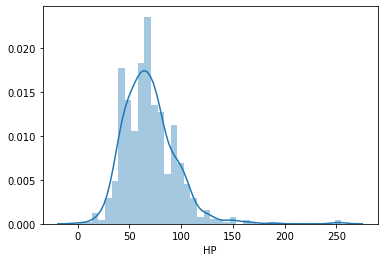

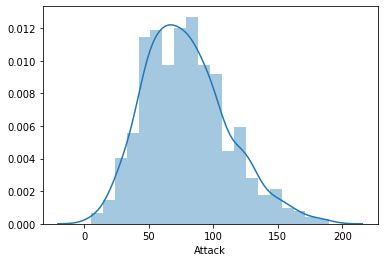

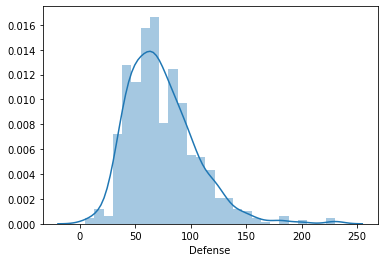

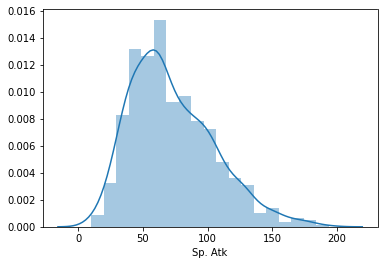

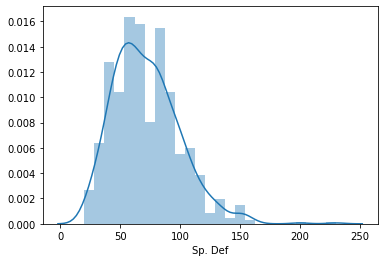

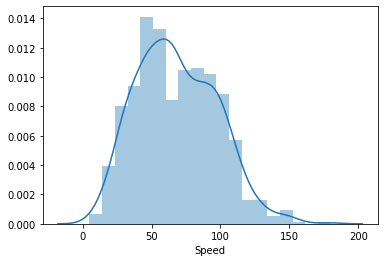

In [342]:
for col in num_cols:
    sns.distplot(data[col])
    plt.show()    

Вид диаграмм показывает, что признаки распределены схожим образом и находятся (примерно) в пределах отрезка [0, 200]

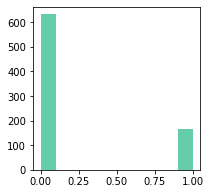

In [351]:
#Оценим дисбаланс классов по целевому признаку:
fig, ax = plt.subplots(figsize=(3,3))
plt.hist(data['Legendary'], color='mediumaquamarine')
plt.show()

In [353]:
total = data.shape[0]
class_0, class_1 = data['Legendary'].value_counts()
print('Доля обычных покемонов = ', round(class_0/total, 4)*100, "%")
print('Доля легендарных покемонов = ', round(class_1/total, 4)*100, "%")

Доля обычных покемонов =  79.0 %
Доля легендарных покемонов =  21.0 %


Таким образом, в рассматриваемых данных присутствует приемлемый дисбаланс классов.

------------------------------------------

### 3. Масштабирование данных.

Масштабирование признаков

Примечание: далее было проведено масштабирование признаков 'Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk',
'Sp. Def', 'Speed' и 'Generation' c целью приведения их к общему числовому диапазону. Однако, получившиеся данные в итоге дают **слишком** хорошие результаты при решении задачи классификации, что делает некоторые пункты данной работы (подбор гиперпараметров и сравнение качества улучшенных и обычных моделей) бессмысленными. Чтобы избежать этого и обеспечить получение "неидеальных" результатов на этапе применения baseline-моделей, мы специально ухудшим наши данные, оставив их немасштабированными. 

In [183]:
# old_data = data.copy()
# old_data.head()

In [184]:
#Масштабирование
# cols_to_scale = ['Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk',
#        'Sp. Def', 'Speed', 'Generation']

# sc1 = MinMaxScaler()
# sc1_data = sc1.fit_transform(data[cols_to_scale])

# for i in range (len(cols_to_scale)):
#     col_name = cols_to_scale[i]
#     data[col_name] = sc1_data[:,i]

# data.head()

In [185]:
#Убеждаемся, что ничего не испортили и ничего не изменилось:

# for col in cols_to_scale:
#     fig, ax = plt.subplots(1, 2, figsize=(8,2))
#     ax[0].hist(data[col], 50)
#     ax[1].hist(old_data[col], 50)
#     ax[1].title.set_text(col)
#     ax[0].title.set_text('scaled_'+col)
#     plt.show()

---------------------------

### 4. Корреляционный анализ данных и выбор признаков для построения моделей

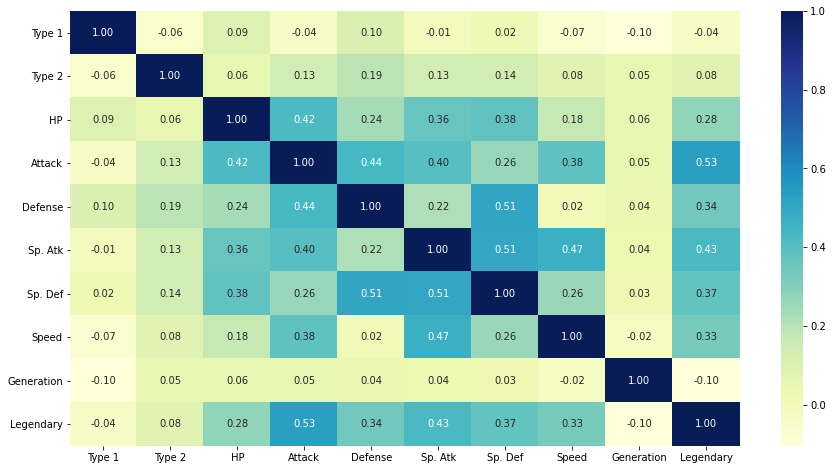

In [379]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(data1.corr(), annot=True, fmt='.2f', cmap='YlGnBu')

Выводы:

- Больше всего на целевой признак Legendary влияют такие признаки, как 'Attack'(0.53), 'Sp. Atk'(0.43) и 'Sp. Def'(0.37). Их обязательно оставляем в модели классификации.
- В своб очередь, признаки, относящиеся к типу покемона ('Type 1', 'Type 2') и его поколению ('Generation') оказывают имеют незначительную корреляцию с целевым признаком, а потому не будут учитываться при построении моделей.

-----------------------------------------------------------------------------------------

### 5. Выбор метрик для оценки качества моделей

В качестве метрик для решения задачи классификации будем использовать:

Метрики, формируемые на основе матрицы ошибок:  

1. Метрика precision - доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Для подсчёта данной метрики используется функция precision_score.  
  
  
2. Метрика recall - доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Для подсчёта используется функция recall_score.  
  
  
3. Метрика F1
Используется для объединения метрик precision и recall в единую метрику путём вычисления среднего гармонического значения.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при параметре β=1
Для вычисления используется функция f1_score.  
  
  
4. Метрика ROC AUC

Данная метрика основана на вычислении следующих характеристик:

TPR=TPTP+FN

- True Positive Rate, откладывается по оси ординат. Совпадает с recall.

FPR=FPFP+TN

- False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.
Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция roc_auc_score.

In [408]:
#Класс для сохранения и визуализации указанных метрик

class ShowMetrix:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

        
    def add(self, metric, alg, value): #Добавление значения

        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

        
    def get_data_for_metric(self, metric, ascending=True): #Формирование данных с фильтром по метрике

        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)): #Вывод графика

        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

------------------------------------

### 6. Выбор подходящих моделей для решения задачи классификации

Для задачи классификации будем использовать следующие модели:

- Метод ближайших соседей
- Линейная регрессия
- МОВ
- Решающее дерево
- Градиентный бустинг
- Случайный лес

### 7. Формирование обучающей и тестовой выборок на основе исходного набора данных

На основе наших обработанных данных выделим тестовую и обучающую выборки:

In [204]:
y = data['Legendary']

X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.25)
print (X_test.shape, Y_test.shape)
print (X_train.shape, Y_train.shape)

(200, 10) (200,)
(600, 10) (600,)


In [205]:
#Признаки для классификации

cols_for_classification = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

---------------------------------------------

### 8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки

In [222]:
# Модели
clas_models = {'LogR': LogisticRegression(max_iter=45), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier(),
               'Tree':DecisionTreeClassifier()}

# Сохранение метрик
showMetrix = ShowMetrix()

In [223]:
#Функция для обучения и применения указанной модели, выводящая результаты в виде графиков

def clas_train_model(model_name, model, clasMetricLogger):
    
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    precision = precision_score(Y_test.values, Y_pred)
    recall = recall_score(Y_test.values, Y_pred)
    f1 = f1_score(Y_test.values, Y_pred)
    roc_auc = roc_auc_score(Y_test.values, Y_pred)
    
    showMetrix.add('precision', model_name, precision)
    showMetrix.add('recall', model_name, recall)
    showMetrix.add('f1', model_name, f1)
    showMetrix.add('roc_auc', model_name, roc_auc)


    print()
    print('-------------------------------------------------------------------------------------')
    print('-----------------------------------------------------')
    print(model)
    print('-----------------------------------------------------')
    print()
    
    print ('Оценка результатов')

    print()
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
    print('--------accuracy--------')
    print('Значения:', scores)
    print('Среднее:', np.mean(scores))
          
    print()
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='precision')
    print('--------precision--------')
    print('Значения:', scores)
    print('Среднее:', np.mean(scores)) 
          
    print()
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='f1_weighted')
    print('--------f1_weighted--------')
    print('Значения:', scores)
    print('Среднее:', np.mean(scores))          
    
    print()
    print('--------ROC AUC--------')
    
    draw_roc_curve(Y_test.values, Y_pred)
    
    plot_confusion_matrix(model, X_test, Y_test.values, 
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    
    print()
    print('--------Матрица ошибок--------')
    plt.show()

In [224]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()


-------------------------------------------------------------------------------------
-----------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=45,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
-----------------------------------------------------

Оценка результатов

--------accuracy--------
Значения: [0.84166667 0.99166667 0.89166667 0.85       0.925     ]
Среднее: 0.9

--------precision--------
Значения: [0.71428571 1.         0.77272727 0.65217391 1.        ]
Среднее: 0.827837380011293

--------f1_weighted--------
Значения: [0.82367011 0.99160345 0.88905119 0.84765625 0.91846427]
Среднее: 0.8940890539995656

--------ROC AUC--------


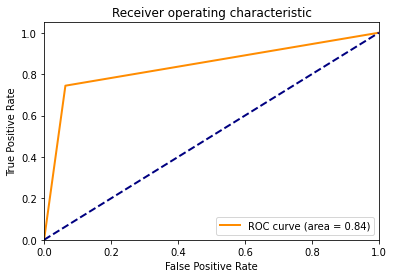


--------Матрица ошибок--------


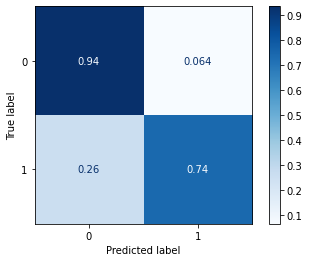


-------------------------------------------------------------------------------------
-----------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
-----------------------------------------------------

Оценка результатов

--------accuracy--------
Значения: [0.9        0.9        0.84166667 0.85       0.80833333]
Среднее: 0.86

--------precision--------
Значения: [0.84210526 0.84210526 0.65       0.66666667 0.55555556]
Среднее: 0.7112865497076022

--------f1_weighted--------
Значения: [0.89471243 0.89471243 0.83490028 0.84502465 0.7961378 ]
Среднее: 0.8530975203724529

--------ROC AUC--------


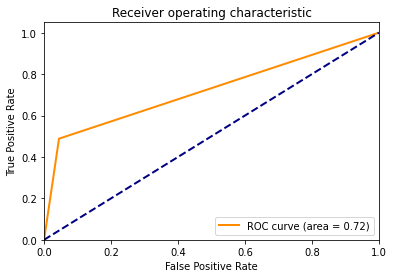


--------Матрица ошибок--------


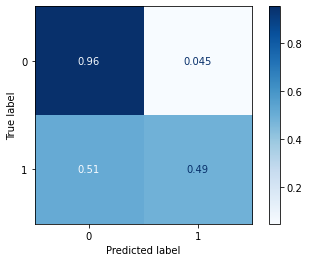


-------------------------------------------------------------------------------------
-----------------------------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
-----------------------------------------------------

Оценка результатов

--------accuracy--------
Значения: [0.88333333 0.90833333 0.85833333 0.85       0.85      ]
Среднее: 0.8699999999999999

--------precision--------
Значения: [0.92307692 0.9375     0.72222222 0.70588235 0.76923077]
Среднее: 0.8115824534942183

--------f1_weighted--------
Значения: [0.86837763 0.90034522 0.84931925 0.83874459 0.83077124]
Среднее: 0.8575115838199178

--------ROC AUC--------


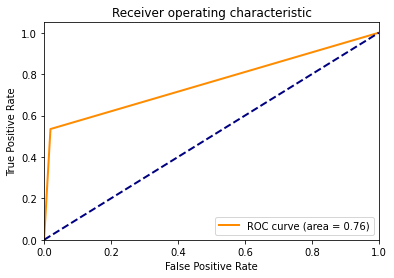


--------Матрица ошибок--------


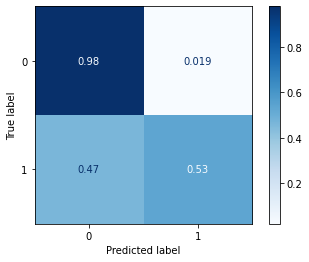


-------------------------------------------------------------------------------------
-----------------------------------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
-----------------------------------------------------

Оценка результатов

--------accuracy--------
Значения: [1. 1. 1. 1. 1.]
Среднее: 1.0

--------precision--------
Значения: [1. 1. 1. 1. 1.]
Среднее: 1.0

--------f1_weighted--------
Значения: [1. 1. 1. 1. 1.]
Среднее: 1.0

--------ROC AUC--------


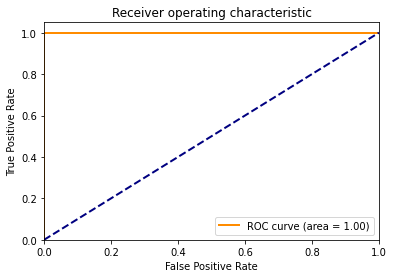


--------Матрица ошибок--------


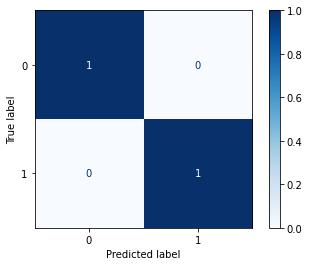


-------------------------------------------------------------------------------------
-----------------------------------------------------
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
-----------------------------------------------------

Оценка результатов

--------accuracy--------
Значения: [1. 1. 1. 1. 1.]
Среднее: 1.0

--------precision----

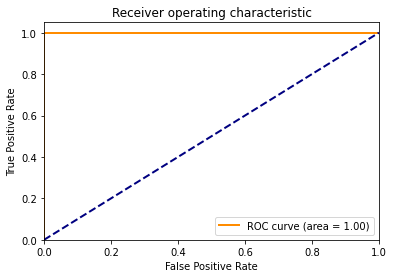


--------Матрица ошибок--------


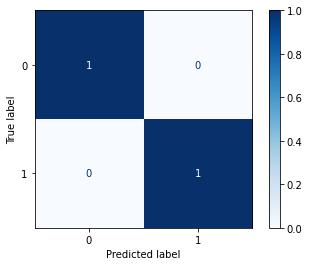


-------------------------------------------------------------------------------------
-----------------------------------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
-----------------------------------------------------

Оценка результатов

--------accuracy--------
Значения: [1. 1. 1. 1. 1.]
Среднее: 1.0

--------precision--------
Значения: [1. 1. 1. 1. 1.]
Среднее: 1.0

--------f1_weighted--------
Значения: [1. 1. 1. 1. 1.]
Среднее: 1.0

--------ROC AUC--------


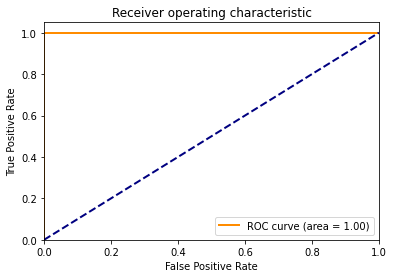


--------Матрица ошибок--------


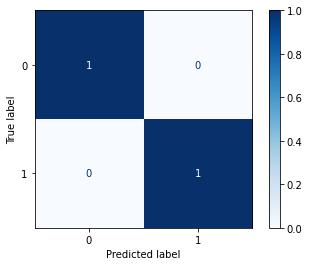

In [225]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, showMetrix)

--------------------------

### 9. Подбор гиперпараметра для модели, работающей на основе метода ближайших соседей, с использованием кросс-валидации

In [395]:
n_range = np.array(range(0,80,2))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
         34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
         68, 70, 72, 74, 76, 78])}]

In [396]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(X_train, Y_train)

CPU times: user 6.9 s, sys: 31.7 ms, total: 6.93 s
Wall time: 7.03 s


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [397]:
print('Лучшее значение параметра:', clf_gs.best_params_)
print('Лучший показатель:', clf_gs.best_score_)

best_n_neighbors = clf_gs.best_params_.copy()

Лучшее значение параметра: {'n_neighbors': 10}
Лучший показатель: 0.865


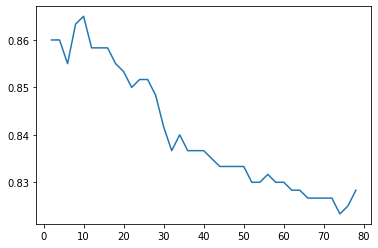

In [398]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

----------------------------------------------------------

#### 9.2. Подбор гиперпараметра для логической регрессии (определение минимального числа итераций для получения оптимального результата)

In [268]:
mi_range = np.array(range(5,150,5))

tuned_parameters = [{'max_iter': mi_range}]
tuned_parameters

[{'max_iter': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
          70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
         135, 140, 145])}]

In [269]:
%%time
clf_gs = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(X_train, Y_train)

CPU times: user 13.4 s, sys: 40.3 ms, total: 13.5 s
Wall time: 13.6 s


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_iter': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [270]:
print('Лучшее значение параметра:', clf_gs.best_params_)
print('Лучший показатель:', clf_gs.best_score_)

Лучшее значение параметра: {'max_iter': 70}
Лучший показатель: 1.0


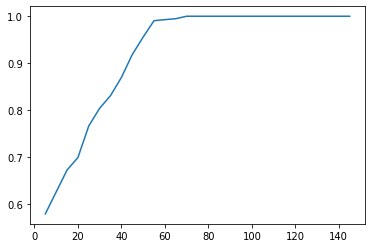

In [271]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(mi_range, clf_gs.cv_results_['mean_test_score'])

--------------------------------

### 10. Метод ближайших соседей с оптимальным значением гиперпараметра. Сравнение качества полученных моделей с качеством baseline-моделей

In [401]:
new_clas_models = {'KNN_new':KNeighborsClassifier(n_neighbors=best_n_neighbors['n_neighbors']) }


-------------------------------------------------------------------------------------
-----------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
-----------------------------------------------------

Оценка результатов

--------accuracy--------
Значения: [0.875      0.89166667 0.84166667 0.86666667 0.85      ]
Среднее: 0.865

--------precision--------
Значения: [0.85714286 0.92857143 0.71428571 0.73684211 0.73333333]
Среднее: 0.7940350877192983

--------f1_weighted--------
Значения: [0.86079219 0.87935323 0.82367011 0.85961657 0.835     ]
Среднее: 0.8516864223196846

--------ROC AUC--------


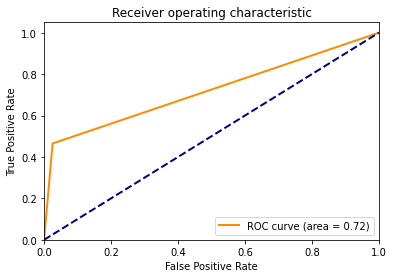


--------Матрица ошибок--------


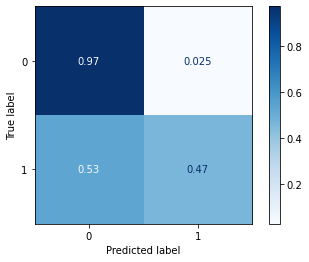

In [402]:
for model_name, model in new_clas_models.items():
    clas_train_model(model_name, model, showMetrix)

------------------------------------------

### 11. Формирование выводов о качестве построенных моделей на основе выбранных метрик

In [262]:
# Метрики качества модели
clas_metrics = showMetrix.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

Построим графики метрик качества моделей:

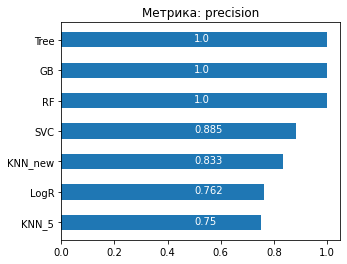

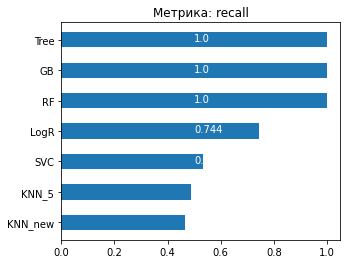

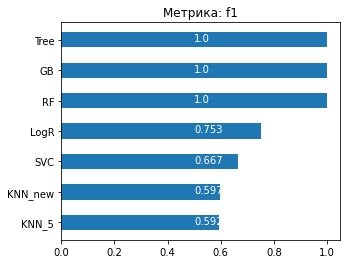

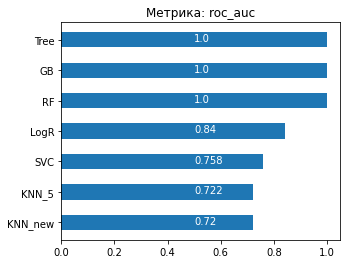

In [409]:
for metric in clas_metrics:
    showMetrix.plot('Метрика: ' + metric, metric, figsize=(5, 4))

Вывод: лучшие результаты работы (100%), подтверждённые всеми метриками, показали модели Решающее дерево, Градиентный бустинг и Случайный лес. Из трёх оставшихся на основании трёх метрик из четырёх наилучшей оказалась модель Линейной регрессии, позволив получить идеальный результат для рассматриваемой выборки за ограниченное число итеарций. Метод ближайших соседей показал наихудший результат, который не претерпел значительных улучшений даже при использовании оптимального параметра. 